In [1]:
from PIL import Image
import numpy as np
import torch

from pulid_src.pulid_processor import PulidProccesor
import sys
sys.path.insert(0,'src')
from diffusers.models.transformers import FluxTransformer2DModel
from diffusers.pipelines.flux import FluxCFGPipeline

/home/kan.maksim/miniconda3/envs/comfy/lib/python3.11/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.23 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


Please 'pip install xformers'
Please 'pip install apex'
Please 'pip install xformers'


In [2]:
device = 'cuda:0'
flux_id = "black-forest-labs/FLUX.1-dev"

In [3]:
transformer = FluxTransformer2DModel.from_pretrained(flux_id
        , subfolder='transformer', torch_dtype=torch.bfloat16, cache_dir='/storage/mkan/flux'
    )
id_processor = PulidProccesor(transformer, device)
id_processor.load_pretrain()

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

/home/kan.maksim/miniconda3/envs/comfy/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/kan.maksim/miniconda3/envs/comfy/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/home/kan.maksim/miniconda3/envs/comfy/lib/python3.11/site-packages/facexlib/detection/__init__.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for m

Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

/home/kan.maksim/miniconda3/envs/comfy/lib/python3.11/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:115: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: ./models/antelopev2/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: ./models/antelopev2/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: ./models/antelopev2/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: ./models/antelopev2/glintr100.onnx recognition ['None', 3, 112, 112] 127.5 127.5
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: ./models/antelopev2/scrfd_10g_bnkps.onnx detection [1, 3, '?', '?'] 127.5 128.0
set det-size: (640, 640)
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': 

In [4]:
pipe = FluxCFGPipeline.from_pretrained(
    flux_id,
    transformer=transformer,
    torch_dtype=torch.bfloat16,
    cache_dir='/storage/mkan/flux'
).to(device)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [5]:
id_img = Image.open('face_3.png')
id_img = np.asarray(id_img)
id_vec, neg_id_vec = id_processor.get_id_embedding(id_img, True)

fail to detect face using insightface, extract embedding on align face


In [6]:
prompt = "woman posing in red dress in modern appartment looking at the camera"

result = pipe(
    prompt=prompt,
    negative_prompt='',
    height=1024,
    width=1024,
    guidance_scale=4,
    true_cfg=1,
    num_inference_steps=20,
    max_sequence_length=512,
    id_emb=id_vec,
    uncond_id_emb=neg_id_vec,
    id_weight=1,
    # generator=generator,
).images[0]

  0%|          | 0/20 [00:00<?, ?it/s]

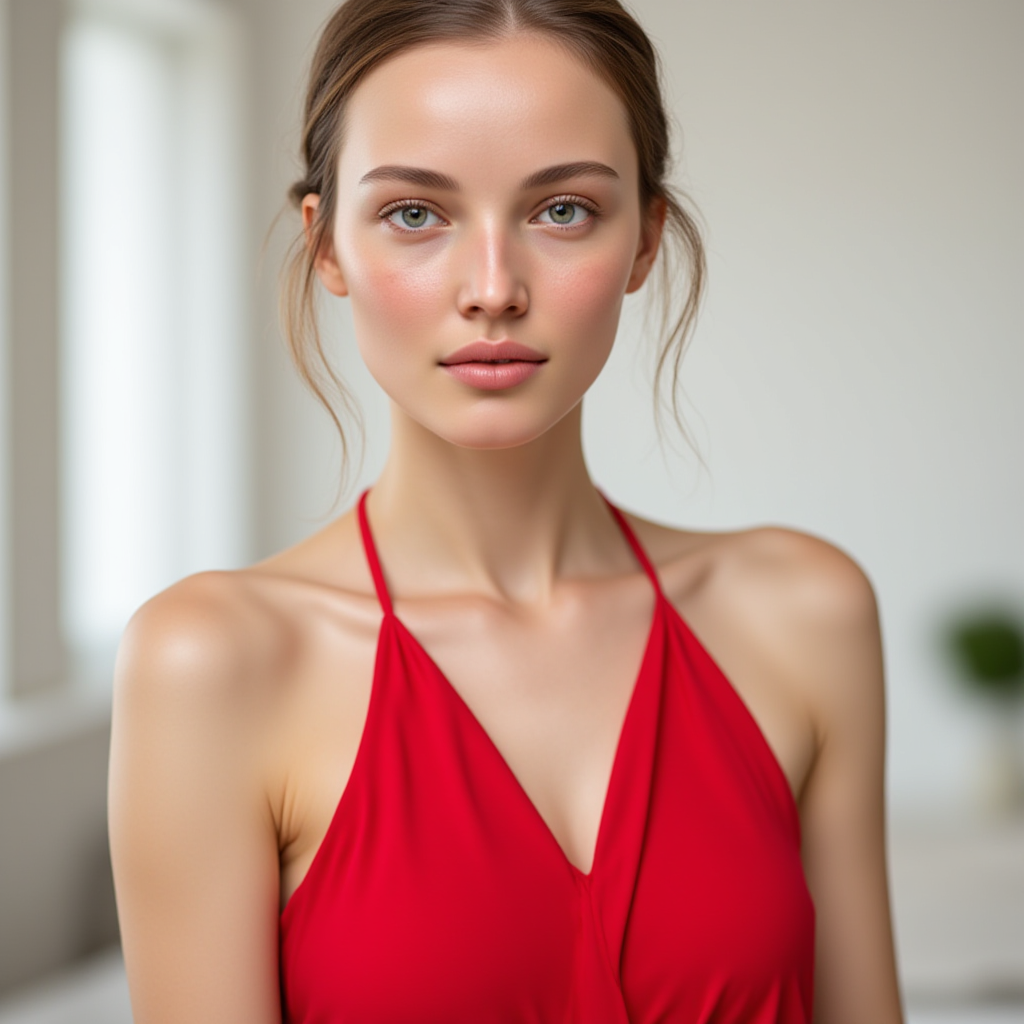

In [8]:
result